### Using OpenCV computer vision to attempt to identify dust plumes

*Videos are made with images generated in Dust_Identification.ipynb*

In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

MovieWriter imagemagick unavailable; using Pillow instead.


RuntimeError: The animation function must return a sequence of Artist objects.

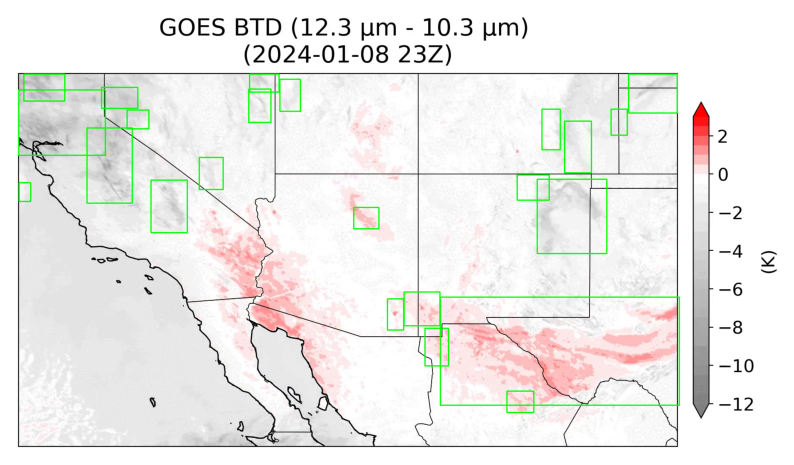

In [3]:
# Load the video
cap = cv.VideoCapture('Dust_Identification_Cases/2024_01_08/animation.mp4')

# Create a Background Subtractor object
fgbg = cv.createBackgroundSubtractorMOG2()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')  # Turn off axis for better visualization

# Initialize the first frame (we'll update this frame in the animation)
frame_rgb = None

# Function to update the plot for each frame
def update_frame(frame_idx):
    global frame_rgb
    ret, frame = cap.read()
    if not ret:
        return None

    # Apply the background subtractor to get the foreground mask
    fgmask = fgbg.apply(frame)

    # Perform some morphological operations to clean up the mask
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
    fgmask = cv.morphologyEx(fgmask, cv.MORPH_CLOSE, kernel)

    # Find contours of the moving parts
    contours, _ = cv.findContours(fgmask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Draw contours around the moving parts
    for contour in contours:
        if cv.contourArea(contour) > 500:  # Filter small contours
            x, y, w, h = cv.boundingRect(contour)
            cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert frame from BGR to RGB for Matplotlib
    frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)

    # Display the frame
    ax.imshow(frame_rgb)
    return [ax.imshow(frame_rgb)]

# Create the animation
ani = FuncAnimation(fig, update_frame, frames=500, interval=50, blit=True)

# Save the animation as a .gif
ani.save('Dust_Identification_Cases/2024_01_08/animation_OpenCV.gif', writer='imagemagick', fps=3)

# Release the video capture object and close the plot
cap.release()
plt.close()